In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv(r'C:\Users\adisa\Downloads\Placement_Data.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          214 non-null    int32  
 1   ssc_p           214 non-null    float64
 2   ssc_b           214 non-null    int32  
 3   hsc_p           214 non-null    float64
 4   hsc_b           214 non-null    int32  
 5   hsc_s           214 non-null    int32  
 6   degree_p        214 non-null    float64
 7   degree_t        214 non-null    int32  
 8   workex          214 non-null    int32  
 9   etest_p         214 non-null    float64
 10  specialisation  214 non-null    int32  
 11  mba_p           214 non-null    float64
 12  status          214 non-null    int32  
 13  salary          214 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 18.4 KB


In [35]:
pd.set_option('display.max_rows', 2000)


{'whiskers': [<matplotlib.lines.Line2D at 0x283d05d3640>,
 'caps': [<matplotlib.lines.Line2D at 0x283d05d3c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x283d05d3370>],
 'medians': [<matplotlib.lines.Line2D at 0x283d05df1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x283d05df4c0>],
 'means': []}

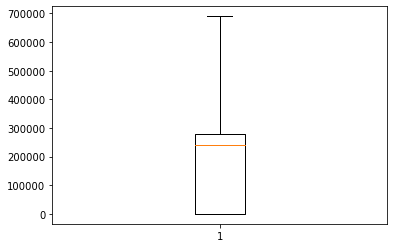

In [11]:
plt.boxplot(df['salary'])

In [10]:
x=df['salary'].quantile(0.25) #removing outliers
y=df['salary'].quantile(0.75)
iqr=y-x
upper_limit=y+(1.5*iqr)
lower_limit=x-(1.5*iqr)
df=df[df['salary']<upper_limit]
df=df[df['salary']>lower_limit]

In [6]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

In [ ]:
le=LabelEncoder()

In [12]:
cols=['gender','hsc_b','ssc_b','hsc_s','degree_t','workex','specialisation','status']

df[cols] = df[cols].apply(LabelEncoder().fit_transform) # label encoding 

In [7]:
df.fillna(0,inplace=True)
df.drop(['sl_no'], axis=1,inplace=True)

In [13]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [16]:
x=df.iloc[:,0:-2].values

In [17]:
x

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [21]:
y=df.iloc[:,-1].values

In [22]:
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000., 360000.,      0., 240000., 265000.,
       350000.,      0., 250000.,      0., 278000., 260000.,      0.,
       300000.,      0., 320000., 240000., 411000., 287000.,      0.,
            0., 300000., 200000.,      0.,      0., 204000., 250000.,
            0., 200000.,      0.,      0., 450000., 216000., 220000.,
       240000., 360000., 268000., 265000., 260000., 300000., 240000.,
            0., 240000.,      0., 275000., 275000.,      0., 275000.,
       360000., 240000., 240000., 218000., 336000.,      0., 230000.,
       500000., 270000.,      0., 240000., 300000.,      0., 300000.,
       300000., 400000., 220000.,      0., 210000., 210000., 300000.,
            0., 230000.,      0., 260000., 420000., 300000.,      0.,
       220000.,     

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_test.shape

(43, 12)

In [26]:
sc=StandardScaler()

In [27]:
x_train=sc.fit_transform(x_train)

In [28]:
x_test=sc.transform(x_test)

In [29]:
x_train

array([[-1.32592025,  0.14252677, -0.99416905, ...,  0.18434411,
         1.14490646,  0.95591621],
       [ 0.75419317,  0.62468317, -0.99416905, ...,  0.19901238,
        -0.8734338 ,  0.62718399],
       [ 0.75419317, -1.43375374, -0.99416905, ...,  0.99109891,
         1.14490646, -1.07098195],
       ...,
       [-1.32592025, -0.67064852, -0.99416905, ..., -0.03567992,
        -0.8734338 , -0.49527474],
       [ 0.75419317, -0.22836276, -0.99416905, ..., -1.1358001 ,
        -0.8734338 , -0.98411489],
       [-1.32592025,  0.88430584,  1.00586515, ..., -1.09912942,
        -0.8734338 , -0.181872  ]])

In [30]:
reg=LinearRegression()

In [31]:
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
reg.coef_

array([ 13247.17657594,  62730.34366123,   7110.84370138,  32990.81081392,
        -9117.10741838,   3290.53719683,  22937.55797661,   -937.73233895,
        23655.92603439,  -5860.3247141 , -15468.03487947, -21530.67813823])

In [33]:
reg.intercept_

197754.38596491233

In [34]:
y_pred=reg.predict(x_test)

In [35]:
metrics.mean_squared_error(y_test,y_pred)

9604157791.856743

In [36]:
metrics.r2_score(y_test,y_pred)

0.4839685303973196


# LOGISTIC REGGRESSION--

In [37]:
x=df.iloc[:,:-2].values

In [38]:
x

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [39]:
y=df['status'].values

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()

In [43]:
x_train=sc.fit_transform(x_train)

In [44]:
x_test=sc.transform(x_test)

In [45]:
lr=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
Y_pred=lr.predict(x_test)

In [48]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [50]:
confusion_matrix(y_test,Y_pred)

array([[11,  7],
       [ 4, 43]], dtype=int64)

<AxesSubplot:>

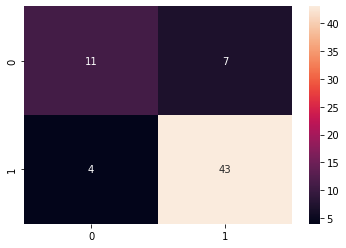

In [51]:
sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True)

In [52]:
tn,fp,fn,tp= confusion_matrix(y_test,Y_pred).ravel()

In [53]:
print(tn,fp,fn,tp)

11 7 4 43


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,Y_pred)

0.8307692307692308

**Find out the auc roc score**


In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test,Y_pred)

0.7630023640661938

**Find out number of 0 in y_test**

In [58]:
print(sum(y_test==0))

18


**Find out the recall and precision**

In [59]:
p=tp/(tp+fp)
p

0.86

In [60]:
r=tp/(tp+fn)
r

0.9148936170212766

**find classification_report**

In [61]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.86      0.91      0.89        47

    accuracy                           0.83        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.82      0.83      0.83        65



In [62]:
p_for_class_0=tn/(tn+fn)
p_for_class_0

0.7333333333333333

In [63]:
r_for_class_0=tn/(tn+fp)
r_for_class_0

0.6111111111111112

**find f1 score for clas  0**

In [64]:
f1_score_for_class0=(2*(p_for_class_0)*(r_for_class_0))/((p_for_class_0)+(r_for_class_0))

In [65]:
f1_score_for_class0

0.6666666666666666

# decision tree

In [67]:
x=df.drop(['status','salary'],axis=1).values
x

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [69]:
y=df['status'].values

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [72]:
dtc=DecisionTreeClassifier()

In [73]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
Y_pred=dtc.predict(x_test)

In [75]:
confusion_matrix(y_test,Y_pred)

array([[11,  7],
       [ 5, 42]], dtype=int64)

In [76]:
tn,fp,fn,tp=confusion_matrix(y_test,Y_pred).ravel()

In [77]:
accuracy_score(y_test,Y_pred)

0.8153846153846154

In [78]:
(tn+tp)/(tn+fp+fn+tp)

0.8153846153846154

In [79]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.86      0.89      0.88        47

    accuracy                           0.82        65
   macro avg       0.77      0.75      0.76        65
weighted avg       0.81      0.82      0.81        65



In [80]:
p=tn/(tn+fn) #precision for zeros
p

0.6875

In [81]:
p=tp/(tp+fp) #precision for ones
p

0.8571428571428571

<function matplotlib.pyplot.show(close=None, block=None)>

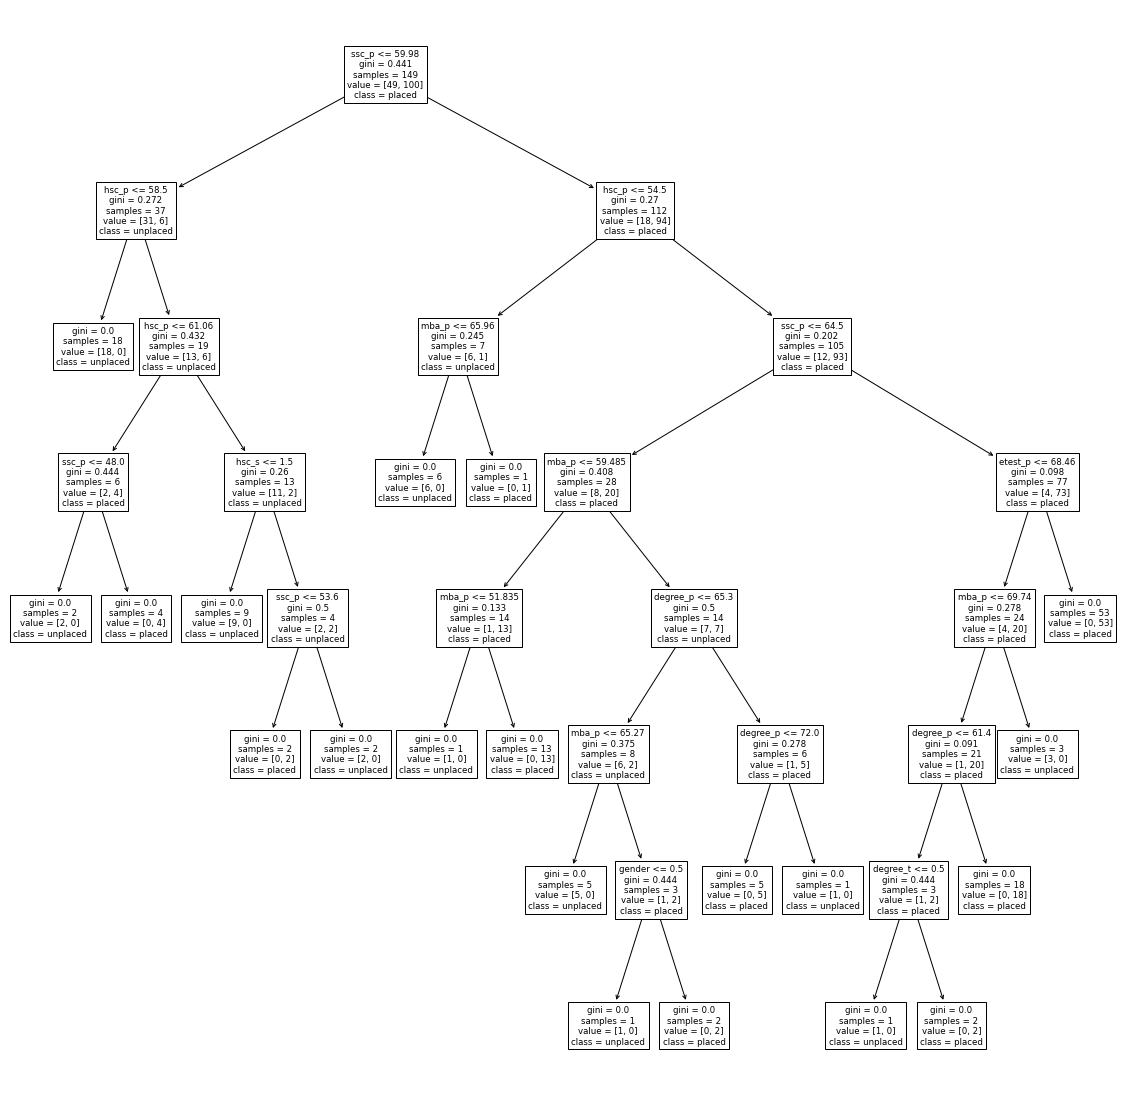

In [82]:

plt.figure(figsize=[20,20])

tree.plot_tree(dtc,feature_names=df.columns[:-2],class_names=['unplaced','placed'])
plt.show



In [58]:
df.columns[:-2]

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [83]:
xx=df.head(1).drop(['status','salary'],axis=1)
xx

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.8


In [84]:
dtc.predict(xx)

C:\Users\adisa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

# Random forest

In [85]:
[int(x) for x in np.linspace(10,40,12)]

[10, 12, 15, 18, 20, 23, 26, 29, 31, 34, 37, 40]

In [86]:
n_est=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_feat=['sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,40,12)]
min_samples_split=[6,10,15,20]
min_samples_leaf=[5,10,12]
criterion=['entropy','gini']

In [87]:
random_grib={
    'n_estimators':n_est,
    'max_features':max_feat,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion
}

In [88]:
type(random_grib)

dict

In [89]:
rfc=RandomForestClassifier()

In [90]:
rscv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grib,n_iter=20,cv=5,n_jobs=-1)

In [91]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 12, 15, 18, 20, 23,
                                                      26, 29, 31, 34, 37, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 12],
                                        'min_samples_split': [6, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [92]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini'}

In [93]:
randomfc=RandomForestClassifier(n_estimators=100,min_samples_split=15,min_samples_leaf=10,max_features='sqrt',max_depth=20,criterion='gini')

In [94]:
randomfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=15)

In [95]:
y_pred=randomfc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [96]:
accuracy_score(y_test,y_pred)

0.8

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        18
           1       0.81      0.94      0.87        47

    accuracy                           0.80        65
   macro avg       0.77      0.69      0.71        65
weighted avg       0.79      0.80      0.78        65



# clusturing

In [122]:

km=KMeans(3)

In [137]:
df.drop('clusters',axis=1,inplace=True)

In [164]:
new_df=df.copy(deep=True)

In [166]:
km.fit(new_df)

KMeans(n_clusters=3)

In [168]:
cluster_value=km.predict(new_df)

In [169]:
new_df['clusters']=cluster_value

In [174]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [171]:
km.inertia_ #gives high inertia so need to scale and drop clusters column and then fit again

548081039616.789

In [172]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [173]:
new_df.drop('clusters',axis=1,inplace=True)

In [175]:
scaled_df=sc.fit_transform(new_df)

In [176]:
scaled_df

array([[ 0.73943397, -0.02808697,  1.08245885, ..., -0.59764672,
         0.67283185,  0.46171105],
       [ 0.73943397,  1.11336869, -0.92382264, ...,  0.6876202 ,
         0.67283185,  0.00840351],
       [ 0.73943397, -0.21323793, -0.92382264, ..., -0.76947385,
         0.67283185,  0.33219461],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ...,  1.27870553,
         0.67283185,  0.6236066 ],
       [-1.35238581,  0.61994138,  1.08245885, ..., -0.35193393,
         0.67283185,  0.0343068 ],
       [ 0.73943397, -0.49096436, -0.92382264, ..., -0.3536522 ,
        -1.48625544, -1.28676089]])

In [ ]:
km.fit(scaled_df)

In [178]:
km.predict(scaled_df)

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0])

In [179]:
km.inertia_

2156.1371072148954

**ELBOW METHOD**

In [180]:
intertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df)
    intertia.append(km.inertia_)
    print(km.inertia_)

C:\Users\adisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3010.0000000000005
2414.051204053431
2156.1371072148954
1999.6614812728192
1859.1315208523233
1761.5032110484754
1677.1190913661735
1603.7374127474895
1548.3126879709196
1499.9355727906047


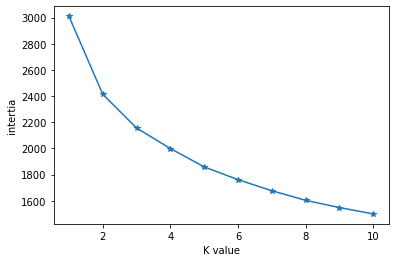

In [181]:
plt.plot([1,2,3,4,5,6,7,8,9,10],intertia,marker='*')
plt.xlabel('K value')
plt.ylabel('intertia')
plt.show()

# PCA

In [8]:
new_df=df.drop(columns=['status','salary'],axis=1)

In [9]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [11]:
sc=StandardScaler()

In [14]:
x=sc.fit_transform(new_df)

In [15]:
x

array([[ 0.73943397, -0.02808697,  1.08245885, ..., -1.29109087,
         1.12390297, -0.59764672],
       [ 0.73943397,  1.11336869, -0.92382264, ...,  1.08715679,
        -0.88975652,  0.6876202 ],
       [ 0.73943397, -0.21323793, -0.92382264, ...,  0.21890765,
        -0.88975652, -0.76947385],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ..., -0.98909117,
        -0.88975652,  1.27870553],
       [-1.35238581,  0.61994138,  1.08245885, ..., -0.15859198,
         1.12390297, -0.35193393],
       [ 0.73943397, -0.49096436, -0.92382264, ...,  1.27590661,
         1.12390297, -0.3536522 ]])

In [21]:
pca=PCA(n_components=8)

In [22]:
x_pca=pca.fit_transform(x)

In [23]:
x_pca

array([[-0.38408188,  1.00591855, -0.53355265, ..., -2.33948159,
        -0.50028684,  2.06506479],
       [ 3.02411341,  0.72903795,  0.9791904 , ...,  0.01621311,
        -0.18145827, -0.26511828],
       [-1.01009462, -2.6079355 , -0.31683672, ..., -0.17053062,
         0.55921371,  0.58298847],
       ...,
       [ 1.06327665, -0.07207941, -1.75223963, ..., -0.37873847,
         0.19686593,  0.19152385],
       [-0.70018853,  0.33738411, -1.1800816 , ..., -0.2581336 ,
        -0.64005351,  0.00581115],
       [-1.57870997,  0.71616884,  0.32224095, ...,  0.69229871,
        -1.7951564 , -0.14773646]])

In [24]:
pca.explained_variance_ratio_

array([0.22700538, 0.15734744, 0.12295117, 0.10887282, 0.08059754,
       0.06645456, 0.06064093, 0.04734529])

In [26]:
new_df.shape

(215, 12)

In [28]:
a=pd.DataFrame(data=x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [29]:
a

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.384082,1.005919,-0.533553,0.111240,-0.065290,-2.339482,-0.500287,2.065065
1,3.024113,0.729038,0.979190,-1.570908,0.363749,0.016213,-0.181458,-0.265118
2,-1.010095,-2.607936,-0.316837,-0.867563,-0.636345,-0.170531,0.559214,0.582988
3,-2.587806,1.231005,2.314697,-0.530583,-0.247154,0.433326,-0.203751,1.160555
4,1.223714,-1.886825,0.517719,-1.439796,-2.031115,-0.313127,0.422455,-0.857295
...,...,...,...,...,...,...,...,...
210,3.129241,-0.558326,-1.746270,0.076551,-1.334316,-0.087448,-0.338594,0.826216
211,-0.367819,2.114337,-0.348269,-1.161212,-0.828637,0.109469,1.554493,-0.445410
212,1.063277,-0.072079,-1.752240,-0.239167,1.711681,-0.378738,0.196866,0.191524
213,-0.700189,0.337384,-1.180082,1.706186,-0.375439,-0.258134,-0.640054,0.005811


In [39]:
a2=pd.concat([a,df[['status','salary']]],axis=1)

In [44]:
a2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,salary
0,-0.384082,1.005919,-0.533553,0.111240,-0.065290,-2.339482,-0.500287,2.065065,270000.0
1,3.024113,0.729038,0.979190,-1.570908,0.363749,0.016213,-0.181458,-0.265118,200000.0
2,-1.010095,-2.607936,-0.316837,-0.867563,-0.636345,-0.170531,0.559214,0.582988,250000.0
3,-2.587806,1.231005,2.314697,-0.530583,-0.247154,0.433326,-0.203751,1.160555,0.0
4,1.223714,-1.886825,0.517719,-1.439796,-2.031115,-0.313127,0.422455,-0.857295,425000.0
...,...,...,...,...,...,...,...,...,...
210,3.129241,-0.558326,-1.746270,0.076551,-1.334316,-0.087448,-0.338594,0.826216,400000.0
211,-0.367819,2.114337,-0.348269,-1.161212,-0.828637,0.109469,1.554493,-0.445410,275000.0
212,1.063277,-0.072079,-1.752240,-0.239167,1.711681,-0.378738,0.196866,0.191524,295000.0
213,-0.700189,0.337384,-1.180082,1.706186,-0.375439,-0.258134,-0.640054,0.005811,204000.0


In [43]:
a2.drop('status',axis=1,inplace=True)

In [45]:
x=a2.loc[:,a2.columns!='salary'].values
y=a2['salary'].values

In [42]:
reg=LinearRegression()

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=reg.predict(x_test)
y_pred

array([210469.16417535, 282880.68648546, 266577.54529815,  48405.48041433,
       240307.58697792,  60243.25530075,  20930.48755207, 302741.81529662,
       279650.57926988, 281303.32992831, 195828.23533462, 193675.48974661,
        84130.11694654, 190704.81919693, 311887.73309978, 143882.34258381,
       371088.34638813, 103055.9015407 , 159112.32328334, 274516.57685966,
       270138.38628148, 344664.93705031, 111706.31880557,  24266.71468585,
       233657.20163168, 278417.42961615, 170997.57302925, 239790.75308506,
       179364.83779463, 205032.58342882, 265809.70924316, 182836.50324948,
       121007.85163421, 232263.53833793, 230610.94787132, 320379.11141107,
       147078.65190824, 142228.93319777, 335477.92393735, 200663.19265161,
       307950.55837768, 224416.17529675, 303882.92075377])

In [52]:
metrics.r2_score(y_test,y_pred)

0.33518795064882756